# **Not an ideal network**

In [1]:
# https://keras.io/
# This cell installs keras from within Jupyter notebook; after installation keras is imported
# allowing us to use the library in our code
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np
# Importing numpy and naming it np as a shortcut to access functionality of numpy

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
# The four import statements above import Sequential (model) from keras and two 
# different types of predefined layers - Convolution2D which is used to carry out convolution
# and the flatten layer which will be used to convert the output of different preceding layers
# to a vector. This is usually done to feed as an input to a fully connected layer

from keras.utils import np_utils
# Import of utility methods from keras utils in order to easily work with numpy

from keras.datasets import mnist
# This imports data from the standard public database on handwritten digits called the MNIST database

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Data is loaded from mnist using a predefined method; this allows splitting data into
# training and test sets. Training set to be used for fitting and test set for validation

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


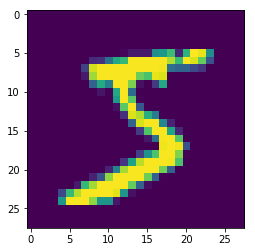

In [4]:
print (X_train.shape)
# printing the shape of the input data set for training, size is 60000 records and images are
# small 28x28 images as can be seen from the output of this statement
from matplotlib import pyplot as plt
# importing pyplot from matplotlib library and renaming it as plt
%matplotlib inline
# telling matplotlib to display images in jupyter output
plt.imshow(X_train[0])
# using matplotlib to plot a sample training set image; the first one here X_train[0]

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
# we are explicitly reshaping the input data to have specific number of records 
# each with size 28x28 with 1 channel

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# in the two statements above, input data is converted to type float32
X_train /= 255
X_test /= 255
# in these two statements above, pixel values in the input are normalized to be numbers in the range 0 to 1
# this is done to improve efficiency of operations that will be applied on the data in code that follows

In [7]:
y_train[:10]
# we show the first 10 outputs or "labels" of the training data set
# these are digits 5,0,... as can be seen below

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
# a utility function from np_utils is used to convert each output label to 
# one-hot-encoded version allowing keras models to work with categorical data
# for example the first training "label" 5 becomes a 10 column vector with position number 5 set as 1.0 and the rest as 0.0
# a 10 column scheme is chosen as we are looking at a 10 way classification problem of digits ranging from 0 to 9

In [9]:
Y_train[:10]
# we show the first 10 outputs or "labels" of the training data set AFTER conversion to categorical
# as explained above the first entry of this array stands for the "label" 5; the second one for the label 0 
# and so on. There will thus be 60000 entries in Y_train, each entry will be the categorical form of the corresponding label

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation, MaxPooling2D
# additional import from keras library of Activation and Max pooling layers
# these will be used in the model being created in the next few lines

model = Sequential() 
# we start with a declaration that we are going to use a sequential model from keras
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# the first layer of the model is a Convolution layer using 32 kernels each kernel is a 3x3 kernel and a relu activation used
# this first layer needs to know the input it is dealing with and the "input_shape" 
# shows that it is of the form 28x28 with 1 channel 
# (1) Input channels = 1 (2) Receptive field = 3 (3) Outputs 32 channels (4) Resolution 26x26
model.add(Convolution2D(64, 3, 3, activation='relu'))
# the second layer of the model is a Convolution layer using 64 kernels each kernel is a 3x3 kernel with relu activation
# (1) Input channels = 32 (2) Receptive field = 5 (3) Outputs 64 channels (4) Resolution 24x24
model.add(Convolution2D(128, 3, 3, activation='relu'))
# the third layer of the model is a Convolution layer using 128 kernels each kernel is a 3x3 kernel with relu activation
# (1) Input channels = 64 (2) Receptive field = 7 (3) Outputs 128 channels (4) Resolution 22x22
model.add(MaxPooling2D(pool_size=(2, 2)))
# the fourth layer of the model is a Max Pooling layer of size 2x2
# (1) Input channels = 128 (2) Receptive field = 14 (3) Outputs 128 channels (4) Resolution 11x11
model.add(Convolution2D(256, 3, 3, activation='relu'))
# the fifth layer of the model is a Convolution layer using 256 kernels each kernel is a 3x3 kernel with relu activation
# (1) Input channels = 128 (2) Receptive field = 16 (3) Outputs 256 channels (4) Resolution 9x9
model.add(Convolution2D(512, 3, 3, activation='relu'))
# the sixth layer of the model is a Convolution layer using 512 kernels each kernel is a 3x3 kernel with relu activation
# (1) Input channels = 256 (2) Receptive field = 18 (3) Outputs 512 channels (4) Resolution 7x7
model.add(Convolution2D(1024, 3, 3, activation='relu'))
# the seventh layer of the model is a Convolution layer using 1024 kernels each kernel is a 3x3 kernel with relu activation
# (1) Input channels = 512 (2) Receptive field = 20 (3) Outputs 1024 channels (4) Resolution 5x5
model.add(Convolution2D(2048, 3, 3, activation='relu'))
# the eighth layer of the model is a Convolution layer using 2048 kernels each kernel is a 3x3 kernel with relu activation
# (1) Input channels = 1024 (2) Receptive field = 22 (3) Outputs 2048 channels (4) Resolution 3x3
model.add(Convolution2D(10, 3, 3, activation='relu'))
# the ninth layer of the model is a Convolution layer using 10 kernels each kernel is a 3x3 kernel with relu activation
# (1) Input channels = 2048 (2) Receptive field = 24 (3) Outputs 10 channels (4) Resolution 1x1
model.add(Flatten())
# the tenth layer of the model is a Flatten layer -used to take the output from preceding channel and create a 1 dim. vector
# (1) Input channels = 10 (2) Receptive field = 24 (3) Outputs 1 vector
model.add(Activation('softmax'))
# A softmax activation is used to find which of the inputs has the highest probability; outputs 10 probability values
model.summary()
# this will print a summary structure of the model with number of parameters, layer structure, etc.

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
# the model created in the above cell is complied with a "categorical cross entropy" loss used for multi-class classification 
# model is compiled with the "ADAM" optimizer and the metrics to be computed is declared as "accuracy"

In [12]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
# model is trained by fitting the input data and the labels using the Training set
# model is trained for 10 epochs choosing a batch size of 32 for the purpose of gradient computation
# verbosity level is set to 1 to ensure that we have feedback as the model trains; helps us understand training progress

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0988
Epoch 2/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
# score is calculated on the "Test Set"
# this will return the loss and accuracy scores of the model on the Test data set

In [14]:
print(score)
# score computed above is printed

[2.3025851249694824, 0.098]


In [0]:
y_pred = model.predict(X_test)
# model is used to predict the labels for the test data set
# these predictions can be compared with the actual Test labels to gauge accuracy

In [16]:
print(y_pred[:9])
print(y_test[:9])
# the first 10 values of the predicted labels are printed along with the values of actual test labels

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


The model used here has many shortcomings, hence the title, "Not an ideal network"
1) The model uses too many parameters for the task and is computationally inefficient (2) The model is designed in such a manner that the entire receptive field is not covered - input images are 28x28 while the effective receptive field is 24 (3) This network is without a Fully-Connected layer and is designed to output 10 probability numbers - not specific class prediction (4) We observe that backpropagation is not effective and the accuracy score remains near 10% which is the same probability as that of choosing 1 out of 10 digits randomly